# Cancer Cells Data Analysis

# Steps:

*  Data Cleaning

*  Data Visualization

*  EDA 

*  Classification of diagnosis

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import imblearn
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [33]:
RANDOM_STATE = 42

In [34]:
df = pd.read_csv("Cancer_Data.csv")

In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


### 1. Data Cleaning

In [36]:
df.shape

(569, 33)

569 rows is too little data. More should be scraped.

In [37]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [38]:
df['Unnamed: 32'].isna().value_counts()

True    569
Name: Unnamed: 32, dtype: int64

In [39]:
df.drop('Unnamed: 32',axis = 1,inplace = True)

In [40]:
null_values = df.isnull().sum()

In [41]:
null_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [43]:
df['id']

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, dtype: int64

In [44]:
df.drop('id',axis = 1,inplace = True)

In [45]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


In [46]:
df['diagnosis'] = pd.Series([1 if label == 'M' else 0 for label in df['diagnosis']])

In [47]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

### 2. Data Visualization

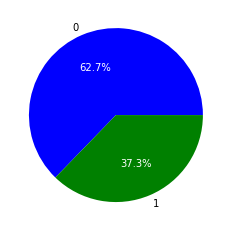

In [48]:
_, _, autotexts = plt.pie(df['diagnosis'].value_counts(),colors = ['blue','green'],labels = [0,1],autopct= '%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')

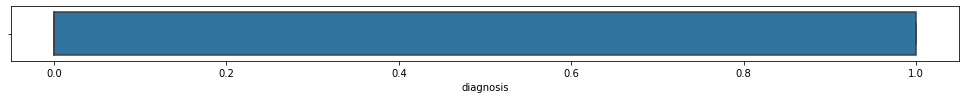

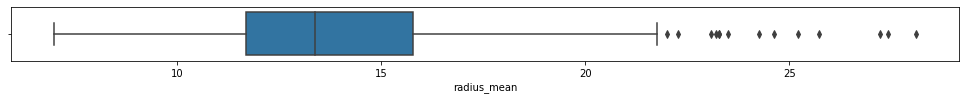

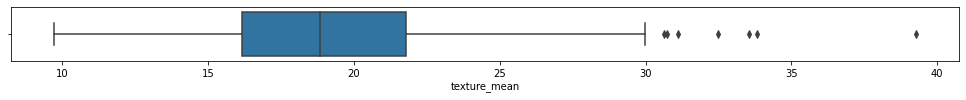

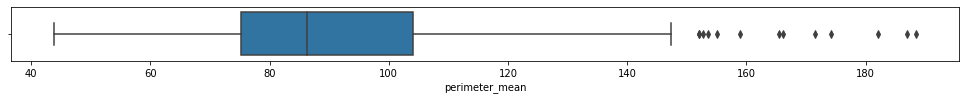

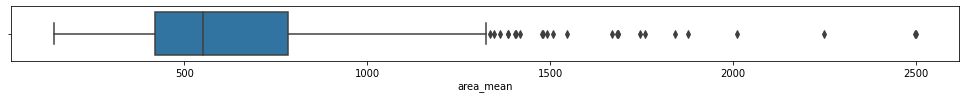

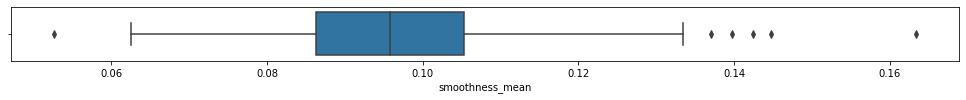

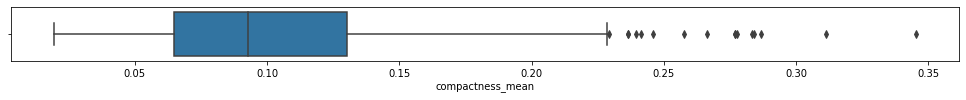

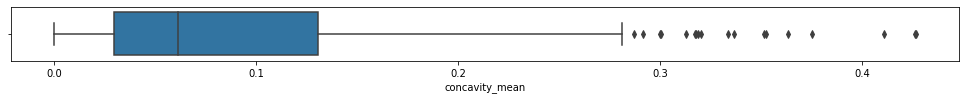

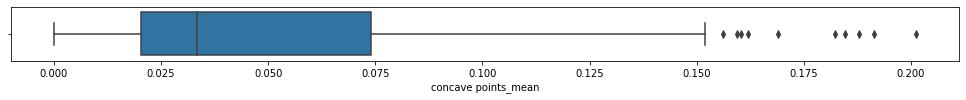

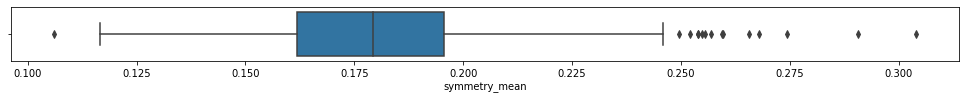

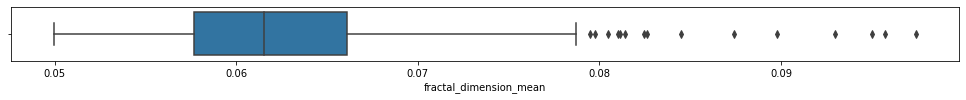

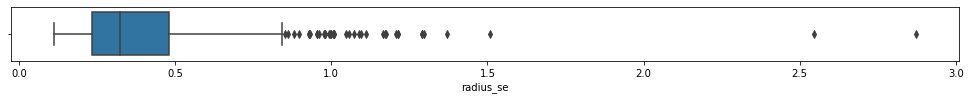

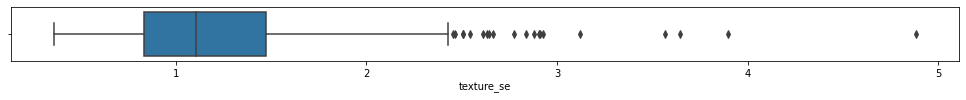

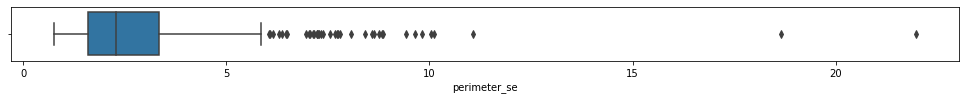

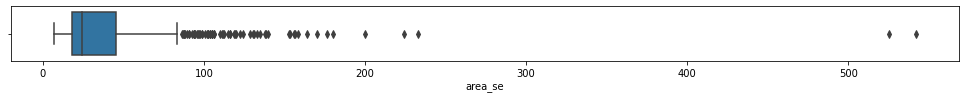

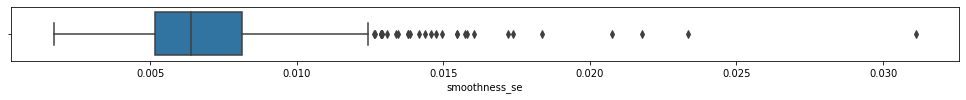

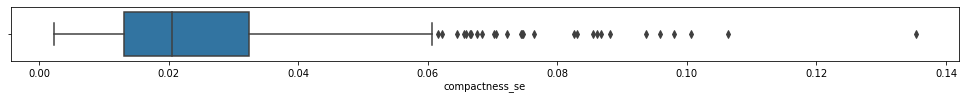

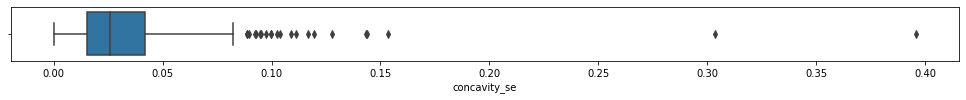

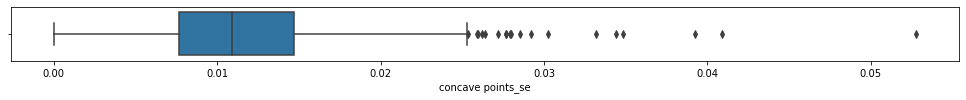

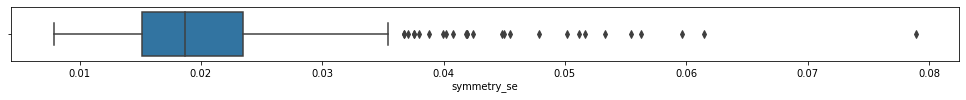

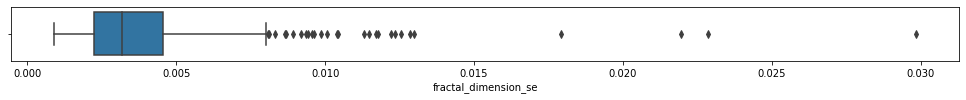

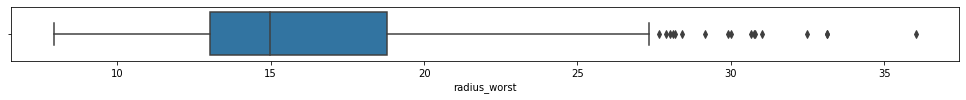

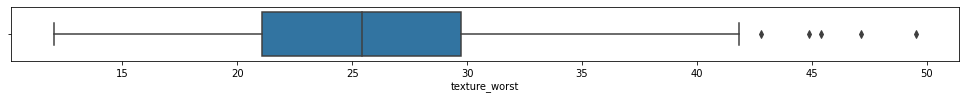

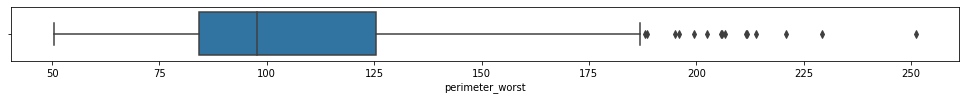

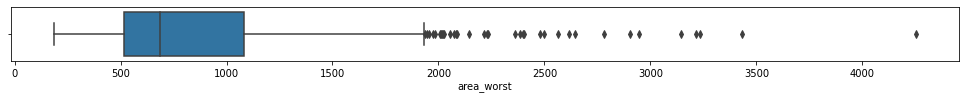

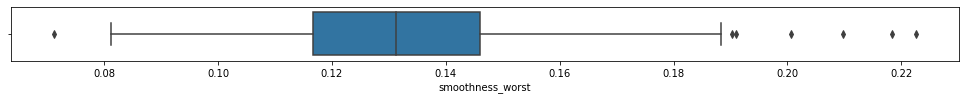

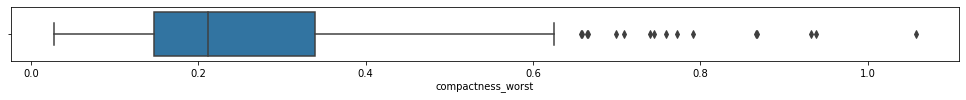

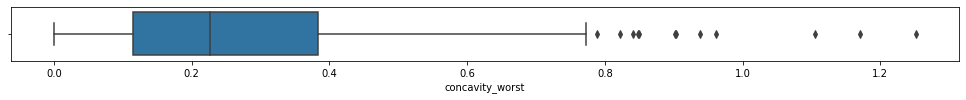

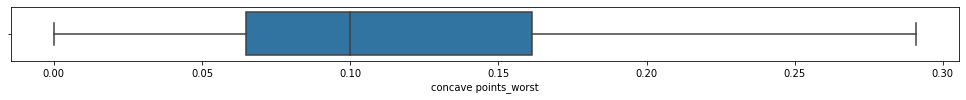

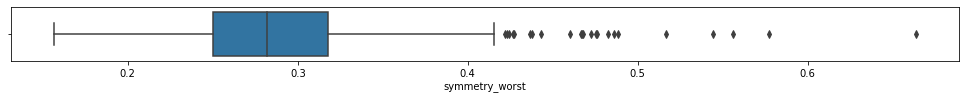

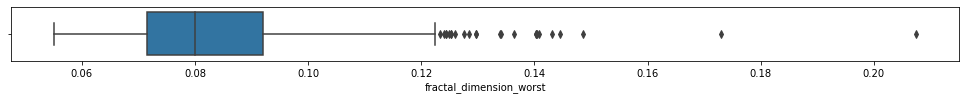

In [49]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

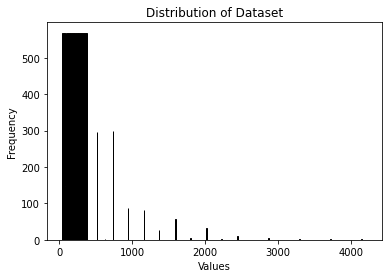

In [50]:
# Generate a random dataset
np.random.seed(RANDOM_STATE)

# Create a histogram
plt.hist(df, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Dataset')

# Display the plot
plt.show()

In [51]:
smote = imblearn.over_sampling.SMOTE(random_state=RANDOM_STATE)

In [52]:
X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [53]:
scaler = sklearn.preprocessing.StandardScaler()

In [54]:
x_train,x_valid,y_train,y_valid = sklearn.model_selection.train_test_split(X,y,stratify=y,random_state=RANDOM_STATE,test_size=0.1)

In [55]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_train, y_train, random_state=RANDOM_STATE,test_size=0.1)

In [56]:
(x_train.shape[0] + x_valid.shape[0] + x_test.shape[0]) == df.shape[0]

True

In [57]:
x_train,y_train = smote.fit_resample(x_train,y_train)

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

x_train = sklearn.preprocessing.normalize(x_train)
x_valid = sklearn.preprocessing.normalize(x_valid)
x_test = sklearn.preprocessing.normalize(x_test)

In [58]:
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=RANDOM_STATE)
models,predictions = lazy_clf.fit(x_train, x_valid, y_train, y_valid)

100%|██████████| 29/29 [00:00<00:00, 45.93it/s]


In [59]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.10
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.07
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.01
LGBMClassifier,1.00,1.00,1.00,1.00,0.06
XGBClassifier,0.98,0.99,0.99,0.98,0.03
RandomForestClassifier,0.98,0.98,0.98,0.98,0.12
SGDClassifier,0.98,0.98,0.98,0.98,0.01
GaussianNB,0.98,0.98,0.98,0.98,0.01
RidgeClassifierCV,0.98,0.98,0.98,0.98,0.01


In [60]:
lazy_clf_test = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=RANDOM_STATE)
models_test,predictions_test = lazy_clf.fit(x_train, x_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:00<00:00, 46.93it/s]


In [61]:
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.10
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.07
XGBClassifier,1.00,1.00,1.00,1.00,0.03
SVC,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.02
LabelSpreading,1.00,1.00,1.00,1.00,0.02
LabelPropagation,1.00,1.00,1.00,1.00,0.02
LGBMClassifier,1.00,1.00,1.00,1.00,0.04
CalibratedClassifierCV,1.00,1.00,1.00,1.00,0.02
